# The Human Development Index (HDI) is a summary measure of achievements in key dimensions of human development: a long and healthy life, access to knowledge, and a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions. The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of education for adults aged 25 years and more and expected years of education for children, and the standard of living dimension is measured by gross national income per capita. https://www.kaggle.com/undp/human-development?select=multidimensional_poverty.csv

In [1]:
import pandas as pd
import numpy as np
np.random.seed(7)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('multidimensional_poverty.csv')
pd.set_option('display.max_columns', None)
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,..
1,Albania,2008/2009 D,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,2005 N,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,..,1.4
3,Armenia,2010 D,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3


# Data cleaning and EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     101 non-null    object 
 1   Year and Survey                             101 non-null    object 
 2   Multidimensional Poverty Index (MPI, HDRO)  101 non-null    float64
 3   MPI HDRO Percent                            101 non-null    float64
 4   Multidimensional Poverty Index (MPI, 2010)  99 non-null     float64
 5   MPI 2010 Percent                            99 non-null     float64
 6   Population in Multidimensional Poverty      101 non-null    object 
 7   Intensity of Deprivation                    101 non-null    float64
 8   Education Deprivation                       101 non-null    float64
 9   Health Deprivation                          101 non-null    float64
 10  Living Standar

# Changing the data types from sting to a numerical version so they could be plotted

In [3]:
#Remove the quotation marks before changing data type
df['Population in Multidimensional Poverty'] = df['Population in Multidimensional Poverty'].str.strip('')


In [4]:
df['Population in Multidimensional Poverty']= pd.to_numeric(df['Population in Multidimensional Poverty'], errors='coerce').astype('Int64')

In [5]:
df['Population Below National Poverty Line']= pd.to_numeric(df['Population Below National Poverty Line'], errors='coerce').astype('float64')

In [6]:
df['Population Below $1.25 per Day']= pd.to_numeric(df['Population Below $1.25 per Day'], errors='coerce').astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     101 non-null    object 
 1   Year and Survey                             101 non-null    object 
 2   Multidimensional Poverty Index (MPI, HDRO)  101 non-null    float64
 3   MPI HDRO Percent                            101 non-null    float64
 4   Multidimensional Poverty Index (MPI, 2010)  99 non-null     float64
 5   MPI 2010 Percent                            99 non-null     float64
 6   Population in Multidimensional Poverty      40 non-null     Int64  
 7   Intensity of Deprivation                    101 non-null    float64
 8   Education Deprivation                       101 non-null    float64
 9   Health Deprivation                          101 non-null    float64
 10  Living Standar

In [8]:
df['Year and Survey'].value_counts()

2010 M         9
2010 D         8
2013 D         8
2012 D         8
2011 D         6
2006 M         5
2011 M         5
2011/2012 D    5
2012 M         4
2008/2009 D    4
2011/2012 M    3
2013/2014 D    3
2012 N         3
2009 D         3
2010/2011 M    3
2012/2013 D    2
2005 M         2
2014 M         2
2012 D/M       2
2014 D         2
2010 N         1
2007 N         1
2013/2014 N    1
2006 D         1
2013 N         1
2013 M         1
2011 N         1
2009 N         1
2009/2010 D    1
2007 M         1
2005/2006 M    1
2005/2006 D    1
2008 D         1
2005 N         1
Name: Year and Survey, dtype: int64

# The Multidimensional Poverty Index (MPI) identifies multiple deprivations at the household level in education, health, and standard of living as indicators of poverty. It looks like health deprivation isn't always as strong as a driver of poverty throughout the time series

<AxesSubplot:>

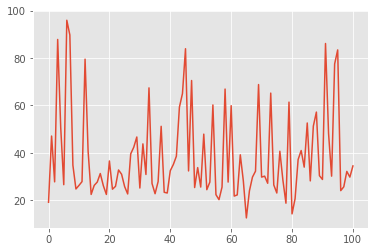

In [9]:
#Assessed by life expectancy at birth
df['Health Deprivation'].plot()

<AxesSubplot:>

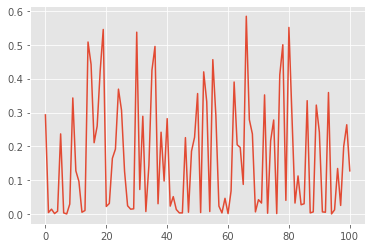

In [10]:
df['Multidimensional Poverty Index (MPI, HDRO)'].plot()

<AxesSubplot:>

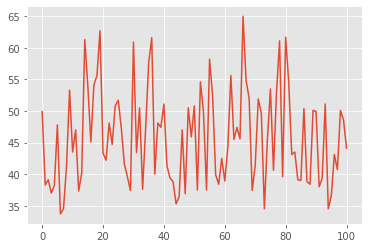

In [11]:
#This will be one of our target variables
df['Intensity of Deprivation'].plot()

# Originally the minimum value of these columns was 0 which didn't make sense to me so I use the value for the 25th percentile for the new minimum but I'm not sure why it didn't match the exact value.

In [12]:
df.describe()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
count,101.000000,101.000000,99.000000,99.000000,40.000000,101.000000,101.000000,101.000000,101.000000,88.000000,86.000000
mean,0.170149,32.599010,0.172949,32.497980,212.475000,45.852475,25.306931,38.507921,36.189109,36.022727,24.748488
std,0.169847,29.718097,0.176056,29.931844,263.184832,7.588631,11.511214,19.097983,14.060227,18.384106,24.997342
min,0.001000,0.400000,0.000000,0.000000,2.000000,33.700000,1.500000,12.600000,2.600000,2.900000,0.000000
25%,0.015000,3.700000,0.015000,3.900000,39.500000,39.100000,17.900000,25.700000,29.400000,21.400000,2.325000
50%,0.127000,26.900000,0.119000,27.200000,90.500000,45.100000,26.400000,30.400000,40.000000,35.500000,17.650000
75%,0.290000,55.600000,0.309500,58.250000,253.500000,50.800000,33.700000,47.100000,46.400000,49.150000,42.700000
max,0.584000,89.800000,0.605000,91.100000,984.000000,65.000000,54.700000,95.900000,56.600000,75.300000,87.700000


In [13]:
df['Multidimensional Poverty Index (MPI, 2010)'] = df['Multidimensional Poverty Index (MPI, 2010)'].replace(0.000000, 0.015000)
df['MPI 2010 Percent'] = df['MPI 2010 Percent'].replace(0.000000, 3.900000)
df['Population Below $1.25 per Day'] = df['Population Below $1.25 per Day'].replace(0.000000, 2.325000)

In [14]:
df.describe()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
count,101.000000,101.000000,99.000000,99.000000,40.000000,101.000000,101.000000,101.000000,101.000000,88.000000,86.000000
mean,0.170149,32.599010,0.173101,32.537374,212.475000,45.852475,25.306931,38.507921,36.189109,36.022727,24.829593
std,0.169847,29.718097,0.175912,29.891175,263.184832,7.588631,11.511214,19.097983,14.060227,18.384106,24.919663
min,0.001000,0.400000,0.001000,0.200000,2.000000,33.700000,1.500000,12.600000,2.600000,2.900000,0.100000
25%,0.015000,3.700000,0.015500,4.050000,39.500000,39.100000,17.900000,25.700000,29.400000,21.400000,2.343750
50%,0.127000,26.900000,0.119000,27.200000,90.500000,45.100000,26.400000,30.400000,40.000000,35.500000,17.650000
75%,0.290000,55.600000,0.309500,58.250000,253.500000,50.800000,33.700000,47.100000,46.400000,49.150000,42.700000
max,0.584000,89.800000,0.605000,91.100000,984.000000,65.000000,54.700000,95.900000,56.600000,75.300000,87.700000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     101 non-null    object 
 1   Year and Survey                             101 non-null    object 
 2   Multidimensional Poverty Index (MPI, HDRO)  101 non-null    float64
 3   MPI HDRO Percent                            101 non-null    float64
 4   Multidimensional Poverty Index (MPI, 2010)  99 non-null     float64
 5   MPI 2010 Percent                            99 non-null     float64
 6   Population in Multidimensional Poverty      40 non-null     Int64  
 7   Intensity of Deprivation                    101 non-null    float64
 8   Education Deprivation                       101 non-null    float64
 9   Health Deprivation                          101 non-null    float64
 10  Living Standar

# Again this is an experiment to see if I can build a model to be used on new data.

In [16]:
df.fillna(method='ffill', inplace=True)

In [17]:
df['Population Below $1.25 per Day'].fillna(value=0, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     101 non-null    object 
 1   Year and Survey                             101 non-null    object 
 2   Multidimensional Poverty Index (MPI, HDRO)  101 non-null    float64
 3   MPI HDRO Percent                            101 non-null    float64
 4   Multidimensional Poverty Index (MPI, 2010)  101 non-null    float64
 5   MPI 2010 Percent                            101 non-null    float64
 6   Population in Multidimensional Poverty      100 non-null    Int64  
 7   Intensity of Deprivation                    101 non-null    float64
 8   Education Deprivation                       101 non-null    float64
 9   Health Deprivation                          101 non-null    float64
 10  Living Standar

In [19]:
df.dtypes

Country                                        object
Year and Survey                                object
Multidimensional Poverty Index (MPI, HDRO)    float64
MPI HDRO Percent                              float64
Multidimensional Poverty Index (MPI, 2010)    float64
MPI 2010 Percent                              float64
Population in Multidimensional Poverty          Int64
Intensity of Deprivation                      float64
Education Deprivation                         float64
Health Deprivation                            float64
Living Standards                              float64
Population Below National Poverty Line        float64
Population Below $1.25 per Day                float64
dtype: object

# What is the most influential factor when determining the Intensity of Deprivation?

# Decision tree regressor

In [20]:
#I had to change the int64 value to float64 for the model to work and fill the null that ffill missed
len(df)

101

In [21]:
X1 = df.drop(['Country', 'Year and Survey', 'Intensity of Deprivation'],axis=1)
IOT = df['Intensity of Deprivation']

In [22]:
X1.dtypes

Multidimensional Poverty Index (MPI, HDRO)    float64
MPI HDRO Percent                              float64
Multidimensional Poverty Index (MPI, 2010)    float64
MPI 2010 Percent                              float64
Population in Multidimensional Poverty          Int64
Education Deprivation                         float64
Health Deprivation                            float64
Living Standards                              float64
Population Below National Poverty Line        float64
Population Below $1.25 per Day                float64
dtype: object

In [23]:
X1['Population in Multidimensional Poverty'].astype('float64')

0        NaN
1       38.0
2       38.0
3       18.0
4      210.0
       ...  
96      69.0
97      69.0
98      69.0
99      69.0
100     69.0
Name: Population in Multidimensional Poverty, Length: 101, dtype: float64

In [24]:
X1['Population in Multidimensional Poverty'].fillna(value=0, inplace=True)

In [25]:
X1.isna().sum()

Multidimensional Poverty Index (MPI, HDRO)    0
MPI HDRO Percent                              0
Multidimensional Poverty Index (MPI, 2010)    0
MPI 2010 Percent                              0
Population in Multidimensional Poverty        0
Education Deprivation                         0
Health Deprivation                            0
Living Standards                              0
Population Below National Poverty Line        0
Population Below $1.25 per Day                0
dtype: int64

In [26]:
X1.shape

(101, 10)

In [27]:
X1.columns

Index(['Multidimensional Poverty Index (MPI, HDRO)', 'MPI HDRO Percent',
       'Multidimensional Poverty Index (MPI, 2010)', 'MPI 2010 Percent',
       'Population in Multidimensional Poverty', 'Education Deprivation',
       'Health Deprivation', 'Living Standards',
       'Population Below National Poverty Line',
       'Population Below $1.25 per Day'],
      dtype='object')

In [28]:
IOT.shape

(101,)

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, IOT, test_size=0.30, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()
rft.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
y_pred = rft.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))
print(sklearn.metrics.r2_score(y_test, y_pred))

12.235661290322577
0.8038944931881165


# It looks like Multidimensional Poverty Index (MPI, HDRO) is the most important feature. This doesn't answer the question I asked.

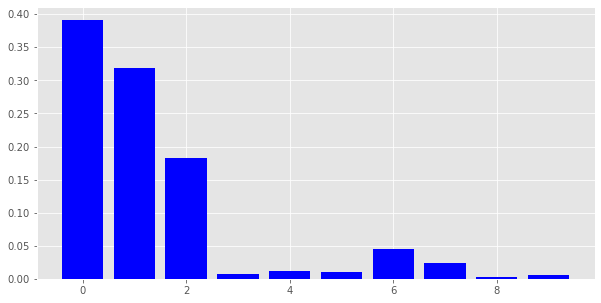

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_rects = ax.bar(np.arange(10), rft.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(10)

In [35]:
X1.head()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,0.293,58.8,0.353,66.2,0,45.6,19.2,35.2,35.8,0.0
1,0.005,1.2,0.005,1.4,38,22.4,47.1,30.5,14.3,0.5
2,0.015,3.7,0.011,2.9,38,38.2,27.8,34.0,14.3,1.4
3,0.002,0.6,0.001,0.3,18,3.4,87.8,8.7,32.0,1.8
4,0.009,2.4,0.021,5.3,210,20.0,50.7,29.3,5.3,0.3


# But it looks like Multidimensional Poverty Index (MPI, HDRO), MPI HDRO Percent, and MPI HDRO Percent are very similar. Let's remove them and try again.

In [36]:
X1.corr()

,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
"Multidimensional Poverty Index (MPI, HDRO)",1.000000,0.990458,0.988230,0.980686,0.004872,0.285275,-0.622349,0.611861,0.501744,0.625540
MPI HDRO Percent,0.990458,1.000000,0.976403,0.987116,0.030549,0.268211,-0.652062,0.666287,0.516267,0.654887
"Multidimensional Poverty Index (MPI, 2010)",0.988230,0.976403,1.000000,0.990254,0.004104,0.278172,-0.603084,0.591601,0.482528,0.616738
MPI 2010 Percent,0.980686,0.987116,0.990254,1.000000,0.024857,0.260834,-0.633921,0.647774,0.501330,0.650661
Population in Multidimensional Poverty,0.004872,0.030549,0.004104,0.024857,1.000000,-0.152872,0.027087,0.088453,0.048455,0.054126
Education Deprivation,0.285275,0.268211,0.278172,0.260834,-0.152872,1.000000,-0.681675,0.107556,0.045121,-0.049149
Health Deprivation,-0.622349,-0.652062,-0.603084,-0.633921,0.027087,-0.681675,1.000000,-0.800725,-0.353959,-0.316002
Living Standards,0.611861,0.666287,0.591601,0.647774,0.088453,0.107556,-0.800725,1.000000,0.443900,0.469898
Population Below National Poverty Line,0.501744,0.516267,0.482528,0.501330,0.048455,0.045121,-0.353959,0.443900,1.000000,0.732162
Population Below $1.25 per Day,0.625540,0.654887,0.616738,0.650661,0.054126,-0.049149,-0.316002,0.469898,0.732162,1.000000


In [37]:
X2 = df.drop(['Country', 'Year and Survey', 'Intensity of Deprivation','Multidimensional Poverty Index (MPI, HDRO)', 'MPI HDRO Percent', 'Multidimensional Poverty Index (MPI, 2010)', 'MPI 2010 Percent','Population Below National Poverty Line'],axis=1)
IOT2 = df['Intensity of Deprivation']

In [38]:
X2.isnull().sum()

Population in Multidimensional Poverty    1
Education Deprivation                     0
Health Deprivation                        0
Living Standards                          0
Population Below $1.25 per Day            0
dtype: int64

In [39]:
X2['Population in Multidimensional Poverty'].astype('float64')

0        NaN
1       38.0
2       38.0
3       18.0
4      210.0
       ...  
96      69.0
97      69.0
98      69.0
99      69.0
100     69.0
Name: Population in Multidimensional Poverty, Length: 101, dtype: float64

In [40]:
X2['Population in Multidimensional Poverty'].fillna(value=0, inplace=True)

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, IOT2, test_size=0.30, random_state=42)

In [42]:
#The r2 score really doesn't matter in this situation
from sklearn.ensemble import RandomForestRegressor
rft2 = RandomForestRegressor()
rft2.fit(X_train2, y_train2)
y_pred2 = rft2.predict(X_test2)
print(mean_squared_error(y_test2, y_pred2))
print(sklearn.metrics.r2_score(y_test2, y_pred2))

18.391609677419357
0.7052308125160941


# After removing all the highly correlated variables, I feel more confident that this chart is a better representation of the main driver of poverty which is health deprivation.

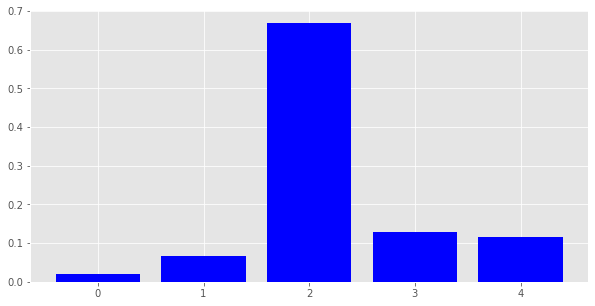

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_rects = ax.bar(np.arange(5), rft2.feature_importances_, color='b')
ax.xaxis.set_ticks = np.arange(5)

In [44]:
X2.head()

,Population in Multidimensional Poverty,Education Deprivation,Health Deprivation,Living Standards,Population Below $1.25 per Day
0,0,45.6,19.2,35.2,0.0
1,38,22.4,47.1,30.5,0.5
2,38,38.2,27.8,34.0,1.4
3,18,3.4,87.8,8.7,1.8
4,210,20.0,50.7,29.3,0.3


# Linear regression - using all three measurements from the X2 dataframe to check how correlated they are to the intensity of deprivation.

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, IOT2, test_size=0.30, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [47]:
lr.fit(X_train2, y_train2)
pred =lr.predict(X_test2)

In [48]:
print(mean_squared_error(y_test2, pred))
print(sklearn.metrics.r2_score(y_test2, pred))

23.76484812149537
0.6191119160139464


No handles with labels found to put in legend.


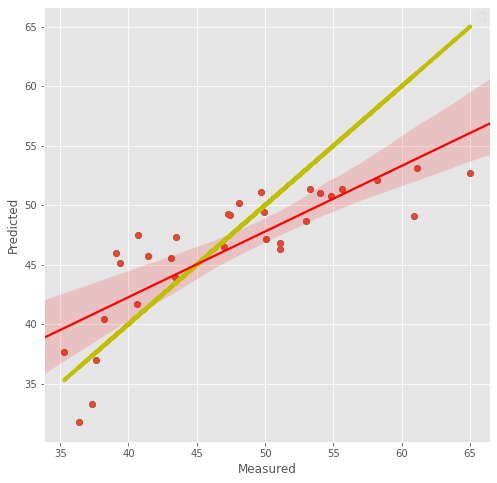

In [49]:
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
#There are clearly other factors that influence poverty that are not in this dataset
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test2, pred, edgecolors=(0, 0, 0))
ax.plot(y_test2, y_test2, 'k--', lw=4, color='y')
sns.regplot(x=y_test2, y=pred, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

In [50]:
X2.head()

,Population in Multidimensional Poverty,Education Deprivation,Health Deprivation,Living Standards,Population Below $1.25 per Day
0,0,45.6,19.2,35.2,0.0
1,38,22.4,47.1,30.5,0.5
2,38,38.2,27.8,34.0,1.4
3,18,3.4,87.8,8.7,1.8
4,210,20.0,50.7,29.3,0.3


In [51]:
#When two features are highly correlated it can have a negative impact on the results of the model
X2.corr()

,Population in Multidimensional Poverty,Education Deprivation,Health Deprivation,Living Standards,Population Below $1.25 per Day
Population in Multidimensional Poverty,1.000000,-0.152872,0.027087,0.088453,0.054126
Education Deprivation,-0.152872,1.000000,-0.681675,0.107556,-0.049149
Health Deprivation,0.027087,-0.681675,1.000000,-0.800725,-0.316002
Living Standards,0.088453,0.107556,-0.800725,1.000000,0.469898
Population Below $1.25 per Day,0.054126,-0.049149,-0.316002,0.469898,1.000000


# Let's compare education deprivation, health deprivation, and living standards individually to the Intensity of Deprivation.

In [52]:
X3 = X2['Education Deprivation']
X4 = X2['Health Deprivation']
X5 = X2['Living Standards']
target = df['Intensity of Deprivation']

In [53]:
X3 = X3.values.reshape(-1,1)
X4 = X4.values.reshape(-1,1)
X5 = X5.values.reshape(-1,1)

In [54]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X3, target, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split( X4, target, test_size=0.30, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split( X5, target, test_size=0.30, random_state=42)

In [55]:
lr.fit(X_train3, y_train3)
lr.fit(X_train4, y_train4)
lr.fit(X_train5, y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
pred3 =lr.predict(X_test3)
pred4 =lr.predict(X_test4)
pred5 =lr.predict(X_test5)

No handles with labels found to put in legend.


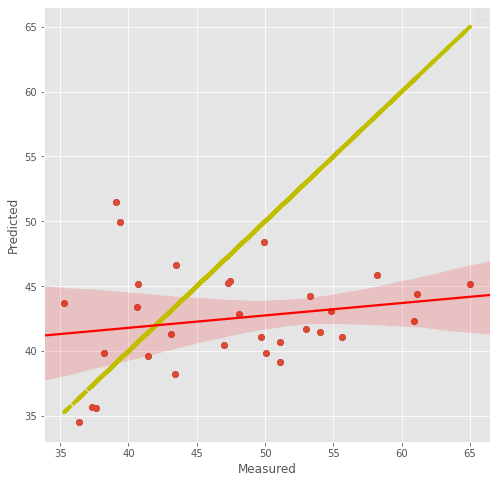

In [57]:
#Education Deprivation
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test3, pred3, edgecolors=(0, 0, 0))
ax.plot(y_test3, y_test3, 'k--', lw=4, color='y')
sns.regplot(x=y_test3, y=pred3, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

No handles with labels found to put in legend.


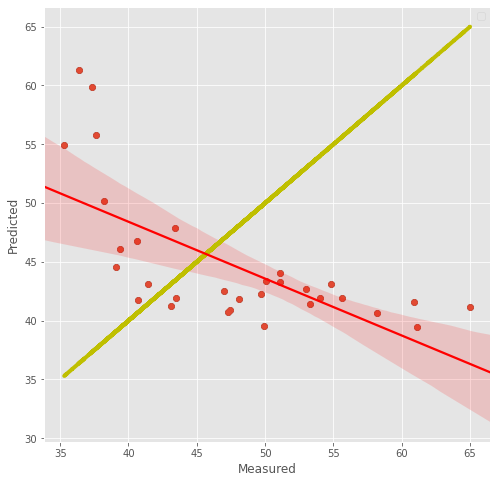

In [58]:
#Health Deprivation
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test4, pred4, edgecolors=(0, 0, 0))
ax.plot(y_test4, y_test4, 'k--', lw=4, color='y')
sns.regplot(x=y_test4, y=pred4, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

No handles with labels found to put in legend.


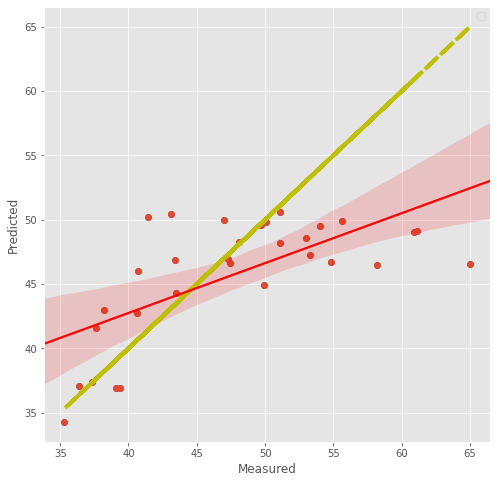

In [59]:
#Living Standard
#Visualizing the accuracy of the model compared to the real data, the red line is the predicted and the yellow is the actual
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test5, pred5, edgecolors=(0, 0, 0))
ax.plot(y_test5, y_test5, 'k--', lw=4, color='y')
sns.regplot(x=y_test5, y=pred5, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

# None of these measurments individually have a stong correlation to either intensity of deprivation or MPI 2010 Percent.

# Unconstrained Population Growth Model.  This model is based off Lebanon. This model does not include deaths, Syrian refugees, and unexpected events like the explosion on 8/4/2020.

In [60]:
pop = 68000000 #6.8 mill
growthrate = 2 # 2.10 births per woman
delta_t = 12
numIterations = 12
growthrateperstep = growthrate * delta_t
for i in enumerate(range(1, numIterations)):
    growth = growthrate * pop
    pop = pop + growthrateperstep 
    t = 1 * delta_t
    
    print(t, pop)

12 68000024
12 68000048
12 68000072
12 68000096
12 68000120
12 68000144
12 68000168
12 68000192
12 68000216
12 68000240
12 68000264


# This is my first attempt at a predator-prey model.  For those wildlife enthusiasts, the lion and cape buffalo rivalry is well known.  In this model I didn't include the rate of lion kills for the buffalo. Cape buffalo can and do kill lions during some encounters.  It is hard to find data on poaching stats as much of it is unreported so I thought I would make these models to add in something about wildlife.

In [61]:
buffalo_reproduction_rate = .005
lion_death_rate = .005
rate_of_kills_per_lion = 5e-6
lion_births_per_buffalo_kill=1
    
    
N=20   #number of timesteps
    

buffalo_pop = 10
lion_pop = 10

for n in range(2,N):
    buffalo_pop += buffalo_pop*n-1 + buffalo_reproduction_rate*buffalo_pop*n-1 - rate_of_kills_per_lion*buffalo_pop*n -1*lion_pop*n -1
    lion_pop += lion_pop*n-1 - lion_death_rate*lion_pop*n-1 + lion_births_per_buffalo_kill*rate_of_kills_per_lion*lion_pop*n -1*buffalo_pop*n -1
        

    print(lion_pop, buffalo_pop)    


12.700299999999995 7.099900000000002
85.39560999999989 -12.594907998499973
2053.506350729437 -407.80862625430944
75904.59444133587 -12727.568531613742
3798484.2499831677 -544904.9915982039
247028853.99795792 -30967685.285699036
20262808180.047634 -2256177471.258971
2046973440403.8918 -205028474794.23886
249767349512036.8 -22735288799094.516
3.622013323443619e+16 -3021513500664608.5
6.157919303354847e+18 -4.7410238384110406e+17
1.2131862177808858e+21 -8.672117015568318e+19
2.7419380133225678e+23 -1.8291489012696637e+22
7.0470676860770396e+25 -4.406941334001274e+24
2.0437186053366565e+28 -1.2028010352017613e+27
6.642274120949924e+30 -3.6918471739076746e+29
2.4045614711301825e+33 -1.2660863720546381e+32
9.642492977938237e+35 -4.823085648829672e+34


In [62]:
pred_pop = 15
prey_pop = 100
pred_birth_frac = 0.001
#pred_births = pred_birth_frac * prey_pop* pred_pop
pred_death_const = 1.06
#pred_deaths = pred_death_const *pred_pop



prey_birth_frac = 2
#prey_births = prey_birth_frac * prey_pop
prey_death_const = 0.02
#prey_deaths = prey_death_const *pred_pop * prey_pop

for i in range(1, 10):
    
    pred_pop1 = pred_birth_frac * prey_pop* pred_pop - pred_death_const *pred_pop   
    prey_pop1 = prey_death_const *pred_pop * prey_pop - prey_birth_frac * prey_pop
    
    print(pred_pop, prey_pop)

15 100
15 100
15 100
15 100
15 100
15 100
15 100
15 100
15 100


# Poverty is something that will always be around, the same with terrorism and wildlife poaching.  There are things that we can do to alleviate poverty and human suffering such as increasing food security.  Using data science and machine learning, we can accurately classify which areas around the world that would benefit the most from these programs and it can also be used to increase crop yield, slow the spread of disease and terrorism, and prevent iconic species from going extinct which provide major cash flow for some of the most impoverished countries.

# 1. EDA and data cleaning


# 2. Decision tree regressor - using these features MPI 2010 Percent	Population in Multidimensional Poverty	Education Deprivation	Health Deprivation	Living Standards	Population Below National Poverty Line	Population Below 1.25 per Day to predict intensity of poverty - 89% accuracy


# 3. Linear regression - 86% accuracy



# 4. What relationship do each of these individually have with intensity of deprivation: Education Deprivation,	Health Deprivation,	Living Standards

# Linear regression - -0.544, -1.467, 0.325 respectivley. Living standards has the strongest out of the 3 but I don't know how that is measured. Poverty has so many dimensions I think it is a combination of drivers that determines poverty rates.



# 5. Unconstrained population growth model based on Lebanon